In [1]:
!git clone https://github.com/hargurjeet/Telecom-Churn-Prediction.git

Cloning into 'Telecom-Churn-Prediction'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 56 (delta 30), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (56/56), 19.33 MiB | 4.61 MiB/s, done.


In [14]:
# !pip install sweetviz
# !pip install ipywidgets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 73.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.9 MB/s eta 0:00:00


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import sweetviz as sv


# libraries for data preprocessing
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/content/Telecom-Churn-Prediction'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_file_path = zipfile.ZipFile('/content/Telecom-Churn-Prediction/train.zip') 
tc_train = pd.read_csv(train_file_path.open('train.csv'))
tc_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [ ]:
# train_file_path = r'/kaggle/input/telecom-churn-case-study-hackathon-c44/train.csv'
# test_file_path = r'/kaggle/input/telecom-churn-case-study-hackathon-c44/test.csv'
# tc_train = pd.read_csv(train_file_path)
# tc_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
tc_train.shape

(69999, 172)

In [4]:
tc_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

## Data Cleaning

In [5]:
## Counting the percent of null values
pd.options.display.max_rows = 180
(tc_train.isnull().sum().sort_values(ascending=False)/ len (tc_train))*100

arpu_3g_6                   74.902499
count_rech_2g_6             74.902499
night_pck_user_6            74.902499
arpu_2g_6                   74.902499
date_of_last_rech_data_6    74.902499
total_rech_data_6           74.902499
av_rech_amt_data_6          74.902499
max_rech_data_6             74.902499
count_rech_3g_6             74.902499
fb_user_6                   74.902499
night_pck_user_7            74.478207
date_of_last_rech_data_7    74.478207
total_rech_data_7           74.478207
max_rech_data_7             74.478207
fb_user_7                   74.478207
count_rech_2g_7             74.478207
count_rech_3g_7             74.478207
arpu_3g_7                   74.478207
av_rech_amt_data_7          74.478207
arpu_2g_7                   74.478207
count_rech_2g_8             73.689624
av_rech_amt_data_8          73.689624
night_pck_user_8            73.689624
max_rech_data_8             73.689624
total_rech_data_8           73.689624
arpu_2g_8                   73.689624
arpu_3g_8   

In [6]:
## Following list of columns seems to have high number of null values
missing_cols =[
    "arpu_3g_6",
    "count_rech_2g_6",
    "night_pck_user_6",
    "arpu_2g_6",
    "date_of_last_rech_data_6",
    "total_rech_data_6",
    "av_rech_amt_data_6",
    "max_rech_data_6",
    "count_rech_3g_6",
    "fb_user_6",
    "night_pck_user_7",
    "date_of_last_rech_data_7",
    "total_rech_data_7",
    "max_rech_data_7",
    "fb_user_7",
    "count_rech_2g_7",
    "count_rech_3g_7",
    "arpu_3g_7",
    "av_rech_amt_data_7",
    "arpu_2g_7",
    "count_rech_2g_8",
    "av_rech_amt_data_8",
    "night_pck_user_8",
    "max_rech_data_8",
    "total_rech_data_8",
    "arpu_2g_8",
    "arpu_3g_8",
    "date_of_last_rech_data_8",
    "fb_user_8",
    "count_rech_3g_8",
    "count_rech_3g_8",
]

## dropping these columns from the original dataset to make it suitable for EDA
tc_train =tc_train.drop(labels=missing_cols, axis=1).copy()

## removing id columns as well
tc_train =tc_train.drop(labels='id', axis=1).copy()

tc_train.shape

(69999, 141)

In [ ]:
## Working on the left over columns with nulls
(tc_train.isnull().sum().sort_values(ascending=False)/ len (tc_train))*100

In [8]:
# Creating a list of columns having null values
cols_nulls = tc_train.columns[tc_train.isna().any()].tolist()
len(cols_nulls)

95

## Handeling Missing Values

In [9]:
sweet_report = sv.analyze(tc_train,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Following are the key observation after creating the report from sweetviz

- Circle_id, loc_og_t2o_mou, std_og_t2o_mou,loc_id_t2o_mou, last_date_of_month_6, last_date_of_month_7, last_date_of_month_8 have constant values. Hence dropping these columns

In [13]:
constant_cols = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou','loc_id_t2o_mou', 'last_date_of_month_6',\
                 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',\
                 'std_og_t2c_mou_8','std_ic_t2o,mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

6/30/2014    69999
Name: last_date_of_month_6, dtype: int64

In [20]:
tc_train.monthly_2g_6.value_counts()

0    64896
1     4688
2      389
3       20
4        6
Name: monthly_2g_6, dtype: int64

6/30/2014    11880
6/29/2014     9049
6/27/2014     7800
6/28/2014     6752
6/26/2014     3918
6/25/2014     3402
6/24/2014     2888
6/17/2014     2887
6/14/2014     2686
6/21/2014     2654
6/23/2014     2060
6/18/2014     1886
6/12/2014     1746
6/22/2014     1624
6/13/2014     1468
6/19/2014     1387
6/20/2014     1252
6/16/2014      783
6/15/2014      605
6/11/2014      398
6/8/2014       368
6/5/2014       229
6/7/2014       223
6/10/2014      200
6/3/2014       172
6/1/2014       155
6/9/2014       135
6/6/2014       123
6/4/2014        90
6/2/2014        78
Name: date_of_last_rech_6, dtype: int64

In [ ]:
tc_train[cols_nulls].hist(figsize=(20,40));

In [ ]:
# most of the above columns are heavly skewed towards 0. Hence replacing nulls by zero
tc_train[cols_nulls] = tc_train[cols_nulls].fillna(0)

tc_train.isnull().sum()

circle_id               0
loc_og_t2o_mou          0
std_og_t2o_mou          0
loc_ic_t2o_mou          0
last_date_of_month_6    0
last_date_of_month_7    0
last_date_of_month_8    0
arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_m

In [ ]:
pd.set_option('display.max_columns', None)
tc_train.head(2)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.0,0.0,0.0,0.0,0.0,0.0,2.23,0.0,0.28,5.29,16.04,2.33,0.0,0.0,0.0,0.0,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.2,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.0,3.26,24.76,24.71,0.0,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.0,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.0,0.00,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.4,3.44,39.44,25.03,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.0,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.0,352.91,0.0,0.0,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.0,0.0,0.0,0


In [ ]:
tc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 141 entries, circle_id to churn_probability
dtypes: float64(108), int64(27), object(6)
memory usage: 75.3+ MB


## Performing EDA

In [ ]:
## Identifying the date columns and converting them to the right format
date_cols = [
    'last_date_of_month_6',
    'last_date_of_month_7',
    'last_date_of_month_8',
    'date_of_last_rech_6',
    'date_of_last_rech_7',
    'date_of_last_rech_8'
]

tc_train[date_cols] = tc_train[date_cols].apply(pd.to_datetime, errors = 'coerce') 

tc_train[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_date_of_month_6  69999 non-null  datetime64[ns]
 1   last_date_of_month_7  69999 non-null  datetime64[ns]
 2   last_date_of_month_8  69999 non-null  datetime64[ns]
 3   date_of_last_rech_6   69999 non-null  datetime64[ns]
 4   date_of_last_rech_7   69999 non-null  datetime64[ns]
 5   date_of_last_rech_8   69999 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 3.2 MB


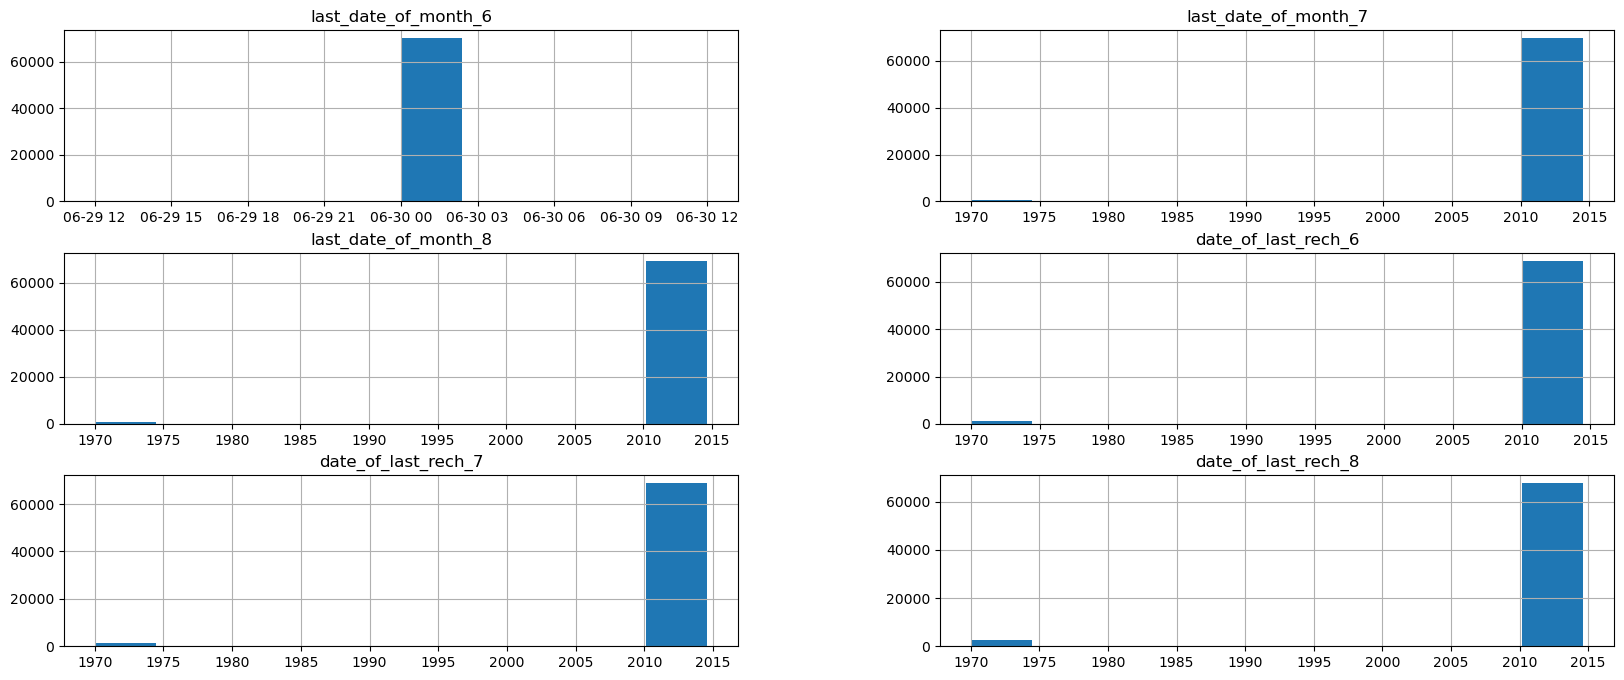

In [ ]:
tc_train[date_cols].hist(figsize=(20,8));

In [ ]:
for column in tc_train[date_cols].columns:
    print(tc_train[column].value_counts())
    print("")

2014-06-30    69999
Name: last_date_of_month_6, dtype: int64

2014-07-31    69600
1970-01-01      399
Name: last_date_of_month_7, dtype: int64

2014-08-31    69266
1970-01-01      733
Name: last_date_of_month_8, dtype: int64

2014-06-30    11880
2014-06-29     9049
2014-06-27     7800
2014-06-28     6752
2014-06-26     3918
2014-06-25     3402
2014-06-24     2888
2014-06-17     2887
2014-06-14     2686
2014-06-21     2654
2014-06-23     2060
2014-06-18     1886
2014-06-12     1746
2014-06-22     1624
2014-06-13     1468
2014-06-19     1387
2014-06-20     1252
1970-01-01     1101
2014-06-16      783
2014-06-15      605
2014-06-11      398
2014-06-08      368
2014-06-05      229
2014-06-07      223
2014-06-10      200
2014-06-03      172
2014-06-01      155
2014-06-09      135
2014-06-06      123
2014-06-04       90
2014-06-02       78
Name: date_of_last_rech_6, dtype: int64

2014-07-31    12206
2014-07-30     9716
2014-07-25     6577
2014-07-29     6320
2014-07-28     5370
2014-07-27   

## key observation

- columns last_date_of_month_6 contains only one values, hence it is best to drop this column.
- rest of the columns contains some data from 1970, which I beleive out of data and might not be relvant in current times.
- After filtering out records belonging to 1970, the column last_date_of_month_7 and last_date_of_month_8 are left with constant values hence will be of not much use for learning. Hence I will be dropping these 2 columns as well.
- month and year remains constant in the columns date_of_last_rech_6, date_of_last_rech_7, date_of_last_rech_8. Hence I will extract day from this columns and overright the original columns itself.

In [ ]:
## Removing the columns
tc_train.drop(labels=['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'], axis=1, inplace=True)

## Filtering out the data for the year 2014
tc_train = tc_train[(tc_train.date_of_last_rech_6.dt.year == 2014) & (tc_train.date_of_last_rech_7.dt.year == 2014) \
                     & (tc_train.date_of_last_rech_8.dt.year == 2014)]

## Overwriting the existing columns with day instead of date
tc_train['date_of_last_rech_6'] = tc_train['date_of_last_rech_6'].dt.day
tc_train['date_of_last_rech_7'] = tc_train['date_of_last_rech_7'].dt.day
tc_train['date_of_last_rech_8'] = tc_train['date_of_last_rech_8'].dt.day

tc_train.shape

(65945, 138)

## Data Prepartion

In [ ]:
## Checking for class im balance
print(tc_train.churn_probability.value_counts())
print()
print('Class imbalance in percentage \n', tc_train.churn_probability.value_counts()/len(tc_train))

0    60500
1     5445
Name: churn_probability, dtype: int64

Class imbalance in percentage 
 0    0.917431
1    0.082569
Name: churn_probability, dtype: float64


The data seems to be highly imbalance hence performing SMOTE to overcome this im balance

In [ ]:
X = tc_train.drop('churn_probability', axis=1)
y = tc_train['churn_probability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42 )

X_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44183 entries, 4274 to 16791
Data columns (total 137 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    circle_id            44183 non-null  int64  
 1    loc_og_t2o_mou       44183 non-null  float64
 2    std_og_t2o_mou       44183 non-null  float64
 3    loc_ic_t2o_mou       44183 non-null  float64
 4    arpu_6               44183 non-null  float64
 5    arpu_7               44183 non-null  float64
 6    arpu_8               44183 non-null  float64
 7    onnet_mou_6          44183 non-null  float64
 8    onnet_mou_7          44183 non-null  float64
 9    onnet_mou_8          44183 non-null  float64
 10   offnet_mou_6         44183 non-null  float64
 11   offnet_mou_7         44183 non-null  float64
 12   offnet_mou_8         44183 non-null  float64
 13   roam_ic_mou_6        44183 non-null  float64
 14   roam_ic_mou_7        44183 non-null  float64
 15   roam_ic_mou_8 

## Implementing SMOTE to overcome class im balance

In [ ]:
smote = SMOTE(random_state = 42)

# fit predictor and target variable
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape \n', y_train.value_counts(), end='\n')
print()
print('Resample dataset shape \n', y_train_smote.value_counts(), end='\n')

Original dataset shape 
 0    40530
1     3653
Name: churn_probability, dtype: int64

Resample dataset shape 
 0    40530
1    40530
Name: churn_probability, dtype: int64


In [ ]:
## Seprating numberical, date and categorical cols
X_train_numberic = X_train_smote.select_dtypes(include=['number'])

X_train_cat = X_train_smote.select_dtypes(include=['object'])

X_train_date = X_train_smote.select_dtypes(include=['datetime64'])

print('Total Numberical columns', len(X_train_numberic.columns))
print('Total Caterforical columns', len(X_train_cat.columns))
print('Total number of date columns', len(X_train_date.columns))

Total Numberical columns 137
Total Caterforical columns 0
Total number of date columns 0


In [ ]:
print(X_train_numberic.shape, X_train_cat.shape, X_train_date.shape)

(81060, 137) (81060, 0) (81060, 0)


The dataset have only numberical columns and no categroical and date columns.

In [ ]:
pd.set_option('display.max_column', None)
X_train_numberic.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,109,0.0,0.0,0.0,84.777,371.077,287.924,11.94,132.74,61.33,24.58,192.84,99.18,7.28,0.0,0.0,1.94,0.0,0.0,11.94,128.09,61.33,6.98,22.38,19.91,0.00,0.70,0.00,0.00,0.00,0.00,18.93,151.18,81.24,0.00,4.64,0.00,15.64,169.76,79.26,0.0,0.0,0.0,0.0,0.0,0.0,15.64,174.41,79.26,0.0,0.0,0.0,0.00,0.00,0.80,0.0,0.0,0.0,34.58,325.59,161.31,60.39,438.29,26.18,2.63,9.44,18.84,0.00,0.00,0.00,63.03,447.74,45.03,4.03,4.56,4.25,54.74,71.91,76.49,0.0,0.00,0.0,0.0,0.0,0.0,58.78,76.48,80.74,121.81,524.23,125.78,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6,10,13,110,460,330,50,120,30,30,31,29,20,30,30,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,602,0.0,0.0,0.0
1,109,0.0,0.0,0.0,261.284,209.174,184.392,24.49,34.44,30.38,230.84,270.91,265.58,37.34,0.0,0.0,32.56,0.0,0.0,19.78,27.53,26.86,202.71,270.91,265.58,0.00,0.00,0.00,0.00,0.00,0.00,222.49,298.44,292.44,0.28,6.91,3.51,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.28,6.91,3.51,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,222.78,305.36,295.96,20.83,24.56,25.46,329.18,243.01,442.41,3.38,0.00,1.63,353.39,267.58,469.51,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,354.08,267.58,469.51,0.48,0.00,0.0,0.00,0.00,0.00,0.20,0.00,0.00,4,3,2,360,128,260,120,128,130,29,22,25,120,128,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,206,0.0,0.0,0.0
2,109,0.0,0.0,0.0,569.970,122.103,0.000,925.01,212.39,0.00,642.01,89.09,0.00,0.00,0.0,0.0,0.00,0.0,0.0,2.19,0.00,0.00,28.31,3.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,30.51,3.54,0.00,922.81,212.39,0.00,613.69,85.54,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1536.51,297.94,0.00,0.0,0.0,0.0,1.99,0.51,0.00,0.0,0.0,0.0,1569.03,302.01,0.00,0.00,0.00,0.00,46.59,18.38,3.68,0.00,0.00,0.00,46.59,18.38,3.68,0.36,5.40,0.00,763.71,55.64,8.90,0.0,0.00,0.0,0.0,0.0,0.0,764.08,61.04,8.90,810.68,79.51,12.58,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.08,0.00,8,4,1,570,140,0,110,110,0,25,31,26,110,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,930,0.0,0.0,0.0
3,109,0.0,0.0,0.0,271.083,96.824,143.660,54.31,9.13,48.98,223.38,80.24,

In [ ]:
X_train_numberic.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81060 entries, 0 to 81059
Data columns (total 137 columns):
 #    Column               Non-Null Count  Dtype  
---   ------               --------------  -----  
 0    circle_id            81060 non-null  int64  
 1    loc_og_t2o_mou       81060 non-null  float64
 2    std_og_t2o_mou       81060 non-null  float64
 3    loc_ic_t2o_mou       81060 non-null  float64
 4    arpu_6               81060 non-null  float64
 5    arpu_7               81060 non-null  float64
 6    arpu_8               81060 non-null  float64
 7    onnet_mou_6          81060 non-null  float64
 8    onnet_mou_7          81060 non-null  float64
 9    onnet_mou_8          81060 non-null  float64
 10   offnet_mou_6         81060 non-null  float64
 11   offnet_mou_7         81060 non-null  float64
 12   offnet_mou_8         81060 non-null  float64
 13   roam_ic_mou_6        81060 non-null  float64
 14   roam_ic_mou_7        81060 non-null  float64
 15   roam_ic_mou_8    

In [ ]:
X_train_numberic.isnull().sum()

circle_id              0
loc_og_t2o_mou         0
std_og_t2o_mou         0
loc_ic_t2o_mou         0
arpu_6                 0
arpu_7                 0
arpu_8                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0
loc_og_mou_6           0
loc_og_mou_7           0
loc_og_mou_8           0
std_og_t2t_mou_6       0
std_og_t2t_mou_7       0
std_og_t2t_mou_8       0
std_og_t2m_mou_6       0
std_og_t2m_mou_7       0
std_og_t2m_mou_8       0


As no null are present hence skipping the imputation step

## Scaling Numberical columns 

In [ ]:
# scaling the data between 0 and 1
scaler = MinMaxScaler()
X_train_numberic_scaled = pd.DataFrame(scaler.fit_transform(X_train_numberic), columns = X_train_numberic.columns)
X_train_numberic_scaled.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,0.0,0.0,0.0,0.0,0.015693,0.056963,0.032231,0.001619,0.016272,0.005704,0.002939,0.027377,0.007081,0.002554,0.0,0.0,0.000514,0.0,0.0,0.001857,0.017308,0.005704,0.001486,0.007463,0.005613,0.000000,0.000859,0.000000,0.000000,0.000000,0.000000,0.001779,0.019698,0.007359,0.000000,0.000570,0.000000,0.001881,0.026235,0.005682,0.0,0.0,0.0,0.0,0.0,0.0,0.001855,0.021385,0.005670,0.0,0.0,0.0,0.000000,0.000000,0.000838,0.0,0.0,0.0,0.003240,0.039296,0.011487,0.013838,0.052877,0.002448,0.000591,0.002344,0.003283,0.000000,0.000000,0.000000,0.008455,0.053612,0.004158,0.001417,0.000968,0.001241,0.009693,0.011708,0.013875,0.0,0.000000,0.0,0.0,0.0,0.0,0.010290,0.011337,0.014268,0.015786,0.062770,0.011614,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040323,0.075630,0.095238,0.006166,0.023953,0.016173,0.015156,0.036375,0.006743,1.000000,1.000000,0.933333,0.006062,0.009677,0.006743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101516,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.026973,0.047681,0.026960,0.003320,0.004222,0.002825,0.027605,0.038460,0.018960,0.013097,0.0,0.0,0.008625,0.0,0.0,0.003076,0.003720,0.002498,0.043159,0.090334,0.074872,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020904,0.038886,0.026489,0.000038,0.000850,0.000438,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000033,0.000847,0.000251,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.020871,0.036854,0.021075,0.004773,0.002963,0.002380,0.073961,0.060345,0.077096,0.001805,0.000000,0.000972,0.047405,0.032040,0.043352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.045888,0.032040,0.043351,0.206009,0.000000,0.0,0.000000,0.000000,0.000000,0.000147,0.000000,0.000000,0.024194,0.016807,0.007937,0.020179,0.006665,0.012742,0.036375,0.038800,0.029220,0.965517,0.700000,0.800000,0.036375,0.041290,0.029220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006255,0.0,0.0,0.0
2,

## Implementing PCA

In [ ]:
pca = PCA(random_state=42)

pca.fit(X_train_numberic_scaled)

PCA(random_state=42)

In [ ]:
## Components from PCA
pca.components_

array([[-3.97390916e-19, -1.11022302e-16, -1.11022302e-16, ...,
        -3.31202126e-03, -3.84335306e-03, -3.70602754e-04],
       [-1.16157751e-19, -1.11022302e-16,  1.37043155e-16, ...,
         5.12369789e-03,  7.11997898e-03,  2.85346151e-03],
       [ 7.26177410e-21, -3.29597460e-17, -2.60208521e-17, ...,
        -2.39161162e-03, -3.15600459e-04,  1.31914323e-03],
       ...,
       [ 0.00000000e+00,  2.17714799e-02,  1.41243496e-02, ...,
        -3.57786717e-17, -4.33680869e-18, -2.72134745e-17],
       [-0.00000000e+00,  1.27699417e-02,  1.08918214e-02, ...,
        -7.49725802e-17,  1.18611718e-16,  1.21972744e-17],
       [ 9.99999032e-01,  1.08479143e-04, -1.38509460e-03, ...,
         4.37069001e-19,  4.26904605e-19, -7.45388994e-20]])

In [ ]:
pca.explained_variance_ratio_

array([2.33524345e-01, 1.75947043e-01, 1.36969221e-01, 1.05530298e-01,
       6.26235968e-02, 3.85399001e-02, 2.86671053e-02, 2.07249737e-02,
       1.73515301e-02, 1.59892939e-02, 1.37139583e-02, 1.21098602e-02,
       1.03952765e-02, 9.08907076e-03, 8.28836257e-03, 8.08187157e-03,
       6.51020291e-03, 5.64008000e-03, 5.09395903e-03, 4.85828713e-03,
       4.34912878e-03, 3.86543123e-03, 3.58795358e-03, 3.49611795e-03,
       3.37447403e-03, 3.14133982e-03, 2.98855383e-03, 2.79256389e-03,
       2.64447737e-03, 2.38572394e-03, 2.33045851e-03, 2.23819611e-03,
       2.10837707e-03, 1.90859664e-03, 1.83842266e-03, 1.77971827e-03,
       1.76381913e-03, 1.64192871e-03, 1.57851512e-03, 1.45286184e-03,
       1.43568033e-03, 1.35981732e-03, 1.27819098e-03, 1.24480456e-03,
       1.21606631e-03, 1.13393450e-03, 1.06705707e-03, 1.00839448e-03,
       9.79120841e-04, 9.32855302e-04, 8.87155116e-04, 8.50777597e-04,
       8.26355755e-04, 8.02965497e-04, 7.85308298e-04, 7.75350366e-04,
      

Text(0, 0.5, 'Cumulative variance explained')

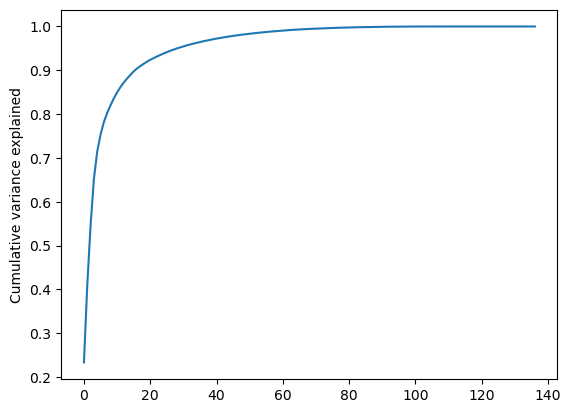

In [ ]:
## Making a scree plot
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(var_cum)
plt.ylabel('Cumulative variance explained')

In [ ]:
pca_final = IncrementalPCA(n_components=16)

In [ ]:
X_train_pca = pca_final.fit_transform(X_train_numberic_scaled)
X_train_pca.shape

(81060, 16)

In [ ]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(16, 16)

<AxesSubplot:>

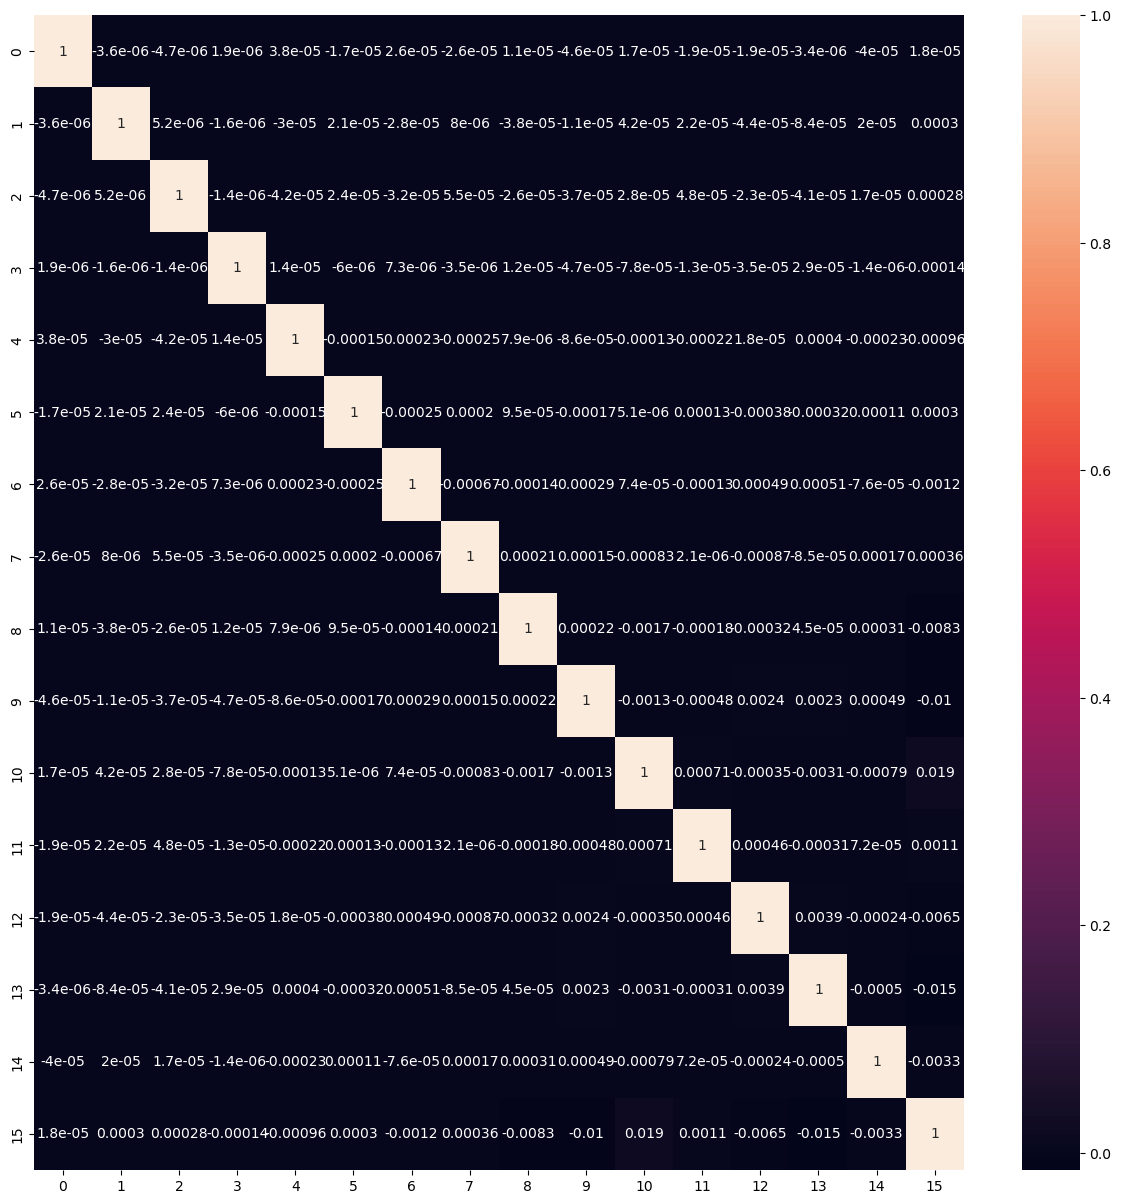

In [ ]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

as we see most of the cells are dark black this showcase the newly created fretures are not co related to each other.

## Apply transformations on Test Set

In [ ]:
X_test

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
58031,109,0.0,0.0,0.0,218.802,74.203,287.146,71.26,24.78,7.13,174.81,78.43,97.14,0.00,0.00,0.00,0.00,0.00,0.00,71.26,24.78,7.13,174.81,77.98,66.41,0.00,0.45,3.51,0.00,0.0,3.04,246.08,103.21,77.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,27.23,0.0,0.0,0.0,246.08,103.21,104.29,18.41,6.21,19.04,79.14,50.71,46.49,7.03,10.13,1.46,104.59,67.06,67.01,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.81,0.00,104.59,67.88,67.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,5,5,160,84,335,110,30,198,26,23,30,50,27,10,0.0,0.00,690.96,0.0,0.00,0.00,0,0,1,0,0,0,0,0,0,0,0,0,838,0.00,0.00,0.00
40592,109,0.0,0.0,0.0,100.066,39.080,85.716,14.39,0.70,5.61,10.68,20.93,44.03,69.04,2.28,31.34,25.08,23.13,49.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3,2,1,90,0,130,90,0,130,13,30,4,0,0,130,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1227,0.00,0.00,0.00
29661,109,0.0,0.0,0.0,78.117,58.871,79.967,5.76,18.08,7.66,69.76,57.99,68.78,0.00,0.00,0.00,0.00,0.00,0.00,5.76,18.08,7.66,66.04,56.04,67.31,3.68,1.95,1.46,0.00,0.0,0.00,75.49,76.08,76.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.03,0.00,0.00,0.0,0.0,0.0,75.53,76.08,76.44,123.11,60.29,83.19,120.88,80.03,77.61,82.93,79.33,55.41,326.93,219.66,216.23,0.00,0.00,0.00,3.88,6.15,0.00,0.18,0.00,0.00,0.0,0.0,0.0,4.06,6.15,0.00,331.21,225.81,216.26,0.00,0.00,0.00,0.00,0.00,0.00,0.21,0.00,0.03,4,5,2,80,110,50,50,110,50,14,20,12,50,0,50,0.0,0.00,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,411,0.00,0.00,0.00
60988,109,0.0,0.0,0.0,41.024,134.435,255.087,0.00,0.00,28.51,3.54,0.00,55.98,0.00,0.00,0

In [ ]:
## Scaling the test set
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_test_scaled.head()

##applying PCA
X_test_PCA = pca_final.transform(X_test_scaled)
X_test_PCA.shape

(21762, 16)

## Building ML Models

In [ ]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(X_train_pca,y_train_smote)

In [ ]:
## prediction on the test set
# pred_probs_test = model_pca.predict(X_test_PCA)

In [ ]:
pred_probs_test = model_pca.predict_proba(X_test_PCA)

In [ ]:
roc_auc_score(y_test, pred_probs_test[:, 1])

0.8011125225785105

In [ ]:
## Furture imporving the performance
pca_again = PCA(0.9)
pca2 = pca_again.fit_transform(X_train_numberic_scaled)
pca2.shape

(81060, 17)

In [ ]:
##applying PCA
X_test_pca2 = pca_again.transform(X_test_scaled)
X_test_pca2.shape

(21762, 17)

In [ ]:
## Logistic Regression
learner_pca2 = LogisticRegression()
learner_pca2.fit(pca2, y_train_smote)

LogisticRegression()

In [ ]:
## evaluation on test set
pred_pca2_proba = learner_pca2.predict_proba(X_test_pca2)

roc_auc_score(y_test, pred_pca2_proba[:, 1])

0.8437187030545819